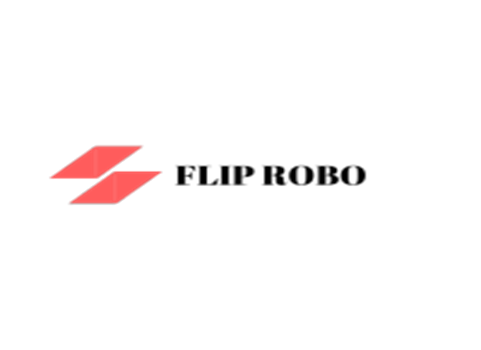

**Name: Vikas Kumar Mishra**

**Batch: Internship-32**

**Id:44**

# PROJECT: Email Spam Classifier

### Context

**The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam.**

### Content

**What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.**

### What is a Spam Filtering?

**Spam Detector is used to detect unwanted, malicious and virus infected texts and helps to separate them from the nonspam texts. It uses a binary type of classification containing the labels such as ‘ham’ (nonspam) and spam. Application of this can be seen in Google Mail (GMAIL) where it segregates the spam emails in order to prevent them from getting into the user’s inbox.**


**The files contain one message per line. Each line is composed by two columns:** 

v1 contains the label (ham or spam) and v2 contains the raw text.


**This corpus has been collected from free or free for research sources at the Internet:**

A collection of 5573 rows SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages.


A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. 

### Below are some of the most popular machine learning methods:

**a) Naïve Bayes classifier:** It is a supervised machine learning algorithm where words probabilities play the main rule here. If some words occur often in spam but not in ham, then this incoming e-mail is probably spam. Naïve bayes classifier technique has become a very popular method in mail filtering software. Bayesian filter should be trained to work effectively. Every word has certain probability of occurring in spam or ham email in its database. If the total of words probabilities exceeds a certain limit, the filter will mark the e-mail to either category.


**b) Artificial Neural Networks classifier:** An artificial neural network (ANN), also called simply a "Neural Network" (NN), is a computational model based on biological neural networks. It consists of an interconnected collection of artificial neurons. An artificial neural network is an adaptive system that changes its structure based on information that flows through the artificial network during a learning phase.

# Machine Learning Model Building

### Importing All the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import sklearn 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score as cvs
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the Data

### Spam Data

In [2]:
df_spam = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df_spam.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
df_spam.shape

(5572, 5)

## 1. Data Cleaning And Preparation

In [5]:
df_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#### Removing Unusual Columns

In [6]:
df_spam.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df_spam.sample(5)

,v1,v2
4441,ham,Dear i am not denying your words please
3731,ham,Gud mrng dear hav a nice day
1939,spam,More people are dogging in your area now. Call...
1251,spam,Please CALL 08712402779 immediately as there i...
3994,ham,R u in this continent?


### Renaming The Columns

In [8]:
df_spam.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [9]:
df_spam.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Encoding The Target Column

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()

In [12]:
df_spam['target'] = encoder.fit_transform(df_spam['target'])

In [13]:
df_spam.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### Missing Value Chek

In [14]:
df_spam.isnull().sum()

target    0
text      0
dtype: int64

#### Chek Duplicate Values

In [15]:
df_spam.duplicated().sum()

403

#### Remove Duplicates Values

In [16]:
df_spam = df_spam.drop_duplicates(keep='first')

In [17]:
df_spam.duplicated().sum()

0

In [18]:
df_spam.shape

(5169, 2)

# 2. EDA

In [19]:
df_spam.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df_spam['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

#### Creating Pie Chart

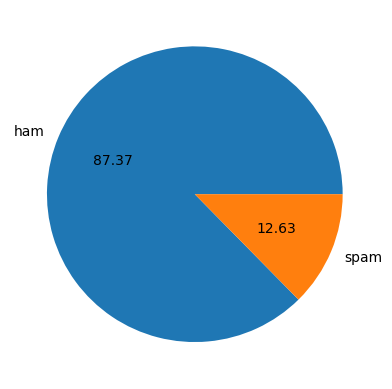

In [21]:
plt.pie(df_spam['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

**Data is Imbalanced**

**We can see in the pie-chart ham messeges are 87% and spam messeges are only 12.6%, so our data is imbalanced**

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

**Punkt:**

**This tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences. It must be trained on a large collection of plaintext in the target language before it can be used.**

### Adding New Columns

In [24]:
# showing number of characters of text messeges

df_spam['num_characters'] = df_spam['text'].apply(len)

In [25]:
df_spam.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


**We can add new column 'num_characters' for showing number of characters in messeges.**

In [26]:
# showing number of words in text messeges

df_spam['num_words'] = df_spam['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df_spam.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


**We can add 2nd new column 'num_words' with the help of lambda function for tokenize the messeges words for showing number of words uses in messeges.**

In [28]:
# showing numbers of sentences in text messeges

df_spam['num_sentences'] = df_spam['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df_spam.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


**We can add 3rd new column 'num_sentences' with the help of lambda function for tokenize the sentences of messeges for showing number of sentences using in messeges.**

In [30]:
df_spam[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


**Using describe() function for describing ['num_characters', 'num_words', 'num_sentences'] columns.**

In [31]:
# describe ham messeges

df_spam[df_spam['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
# describe spam messeges

df_spam[df_spam['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


### Plotting Histogram For Ham and Spam messeges

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

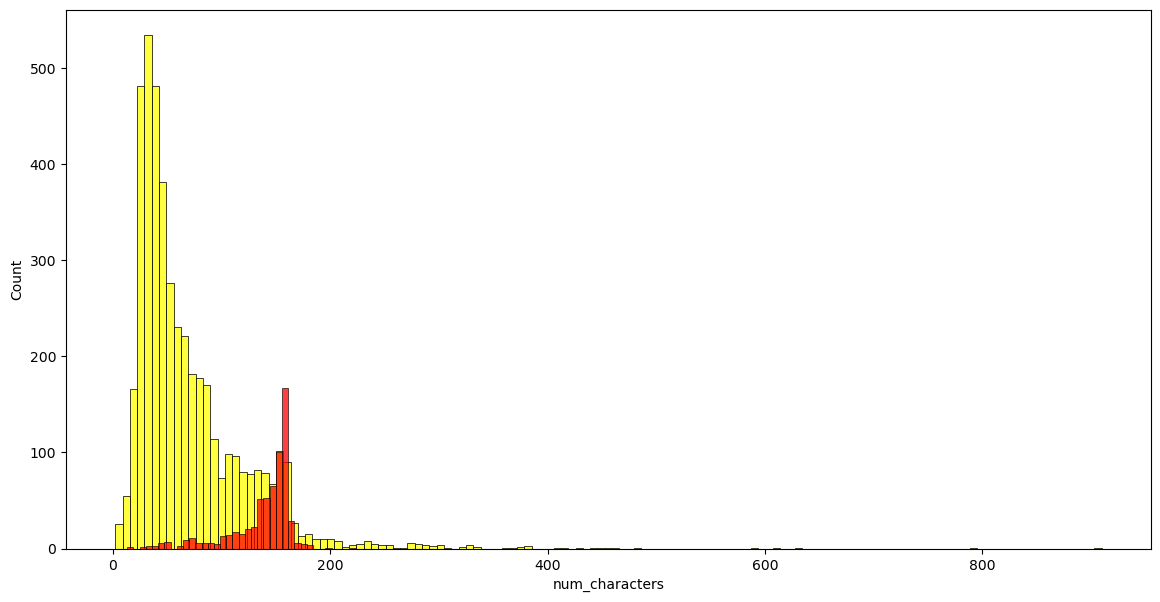

In [33]:
plt.figure(figsize=(14,7))
sns.histplot(df_spam[df_spam['target']==0]['num_characters'], color='yellow')
sns.histplot(df_spam[df_spam['target']==1]['num_characters'], color='red')

**0 = ham messeges**

**1 = spam messeges**

**We can see in this histogram plot yellow line for ham messeges and red line for spam messeges.**

**We can see number of characters of ham messeges are high.**

<AxesSubplot:xlabel='num_words', ylabel='Count'>

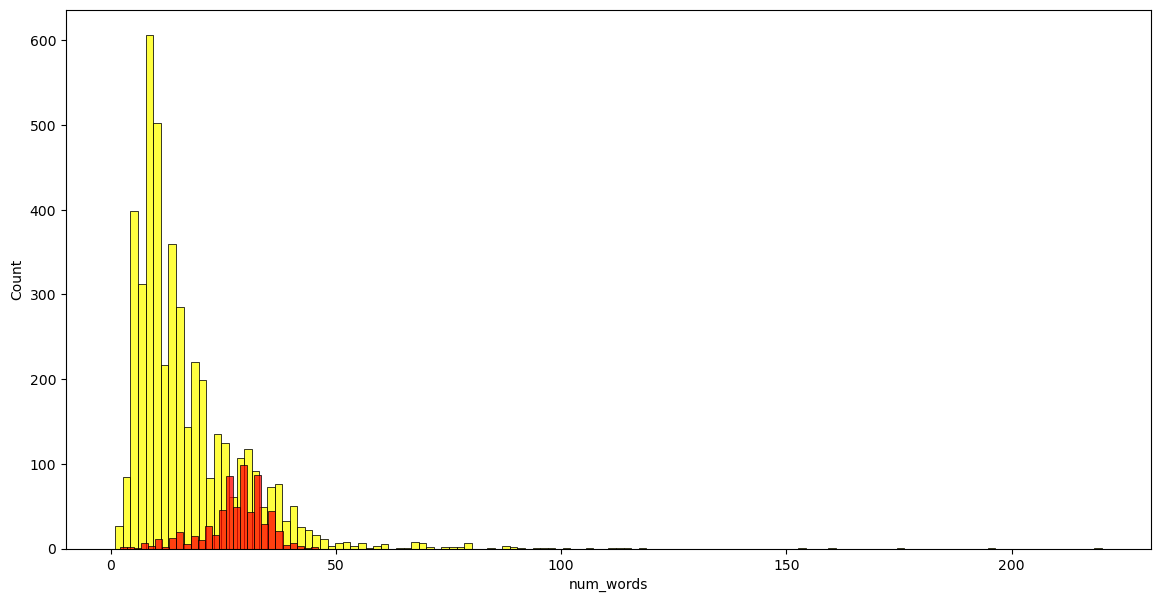

In [34]:
plt.figure(figsize=(14,7))
sns.histplot(df_spam[df_spam['target']==0]['num_words'], color='yellow')
sns.histplot(df_spam[df_spam['target']==1]['num_words'], color='red')

**0 = ham messeges**

**1 = spam messeges**

**We can see in this histogram plot yellow line for ham messeges and red line for spam messeges.**

**We can see number of words of ham messeges are higher than spam messeges.**

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

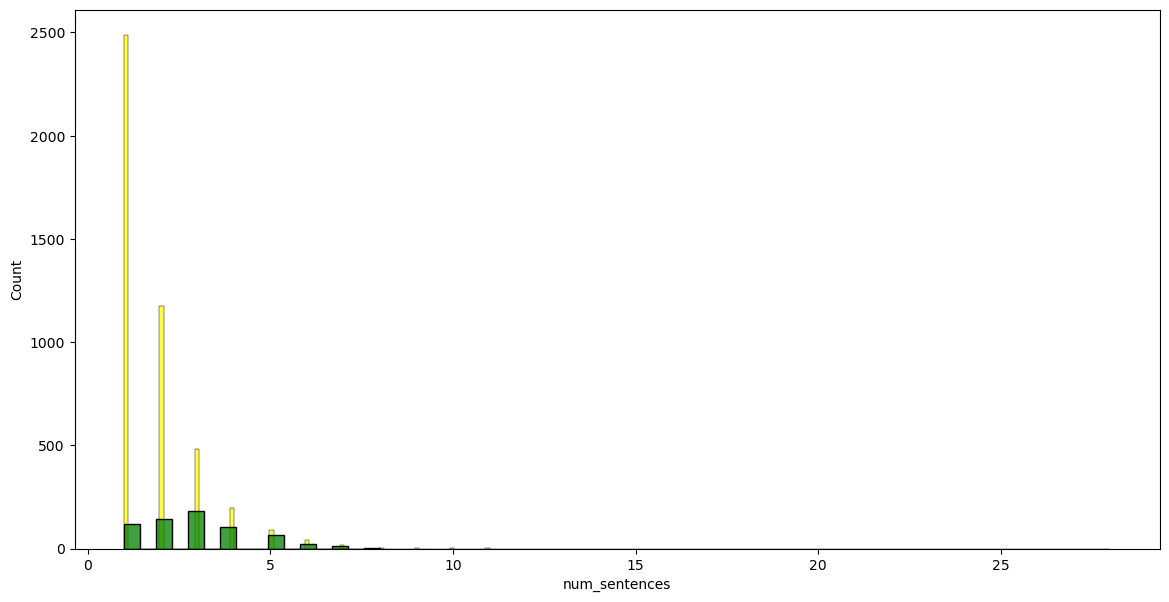

In [35]:
plt.figure(figsize=(14,7))
sns.histplot(df_spam[df_spam['target']==0]['num_sentences'], color='yellow')
sns.histplot(df_spam[df_spam['target']==1]['num_sentences'], color='green')

**0 = ham messeges**

**1 = spam messeges**

**We can see in this histogram plot yellow line for ham messeges and green line for spam messeges.**

**We can see number of sentences of ham messeges are higher than spam messeges.**

### Plotting Pair Plot

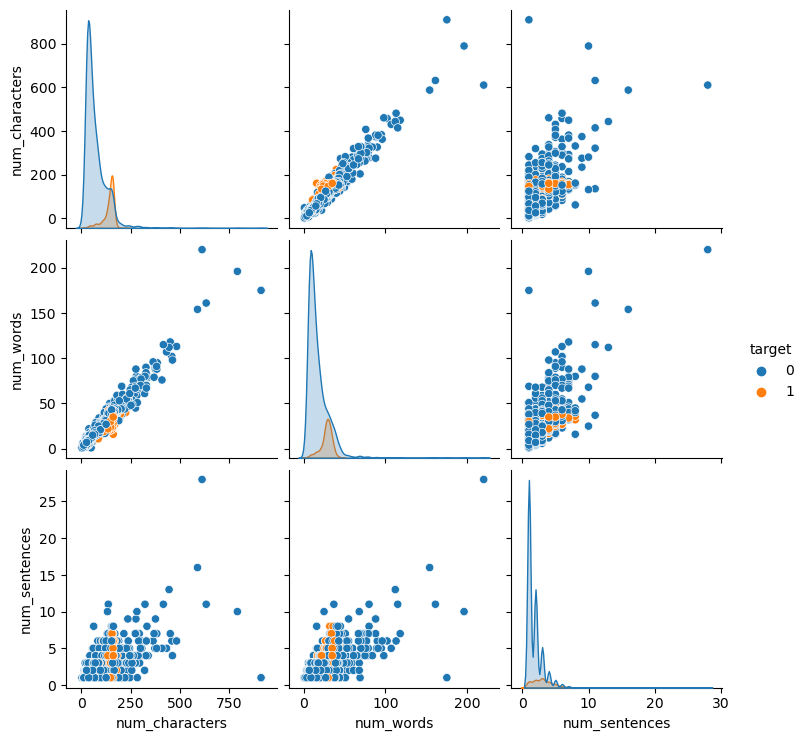

In [36]:
sns.pairplot(df_spam, hue='target')

**We can see in pair plot of ham or spam messeges :**

**Blue for ham messeges and orange for spam messeges.**

**In pair plot blue dots are more than orange dots, in our data ham meseges are higher than spam messeges.**

### Correlation Between Columns

In [37]:
df_spam.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

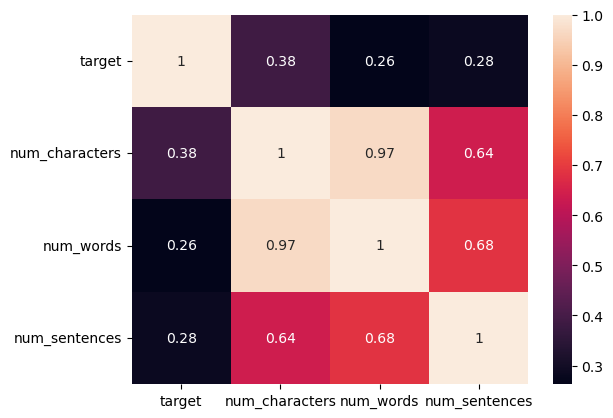

In [38]:
# see correlation in heatmap

sns.heatmap(df_spam.corr(), annot=True)

# 3. Data Preprocessing

**Lower case**

**Tokenization**

**Removing Special Characters**

**Removing Stopwords and Punctuation**

**Stemming**

### Importing NLTK Libraries

**The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP). It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.**

In [39]:
import nltk
from nltk.corpus import stopwords

In [40]:
stop = stopwords.words('english')

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [42]:
import string

### Creating Function

In [43]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stop and i not in string.punctuation:
            y.append(i)
            
            
    text = y[:]
    y.clear()
    
    
    for i in text:
        y.append(ps.stem(i))
        
        
    return " ".join(y)

**Creating a function (transform_text) for word tokenize, punctuation and stop words removal, lemitization, converting lowercase and stemming.**  

In [44]:
#transform_text('I am gonna be home soon and i don t want to talk about this stuff anymore tonight, k? I ve cried enough today.')

In [45]:
#df_spam['text'][10]

In [46]:
df_spam['transformed_text'] = df_spam['text'].apply(transform_text)

In [47]:
df_spam.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


 **After completing all transformation of messeges adding one more column 'transformed_text'**

### Word Cloud For Frequency of Images and Word

**Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud**

In [48]:
from wordcloud import WordCloud

### Word Cloud For Spam Messeges

In [49]:
wc = WordCloud(width=800, height=800, min_font_size=10, background_color='white')

In [50]:
spam_wc = wc.generate(df_spam[df_spam['target']==1]['transformed_text'].str.cat(sep=" "))

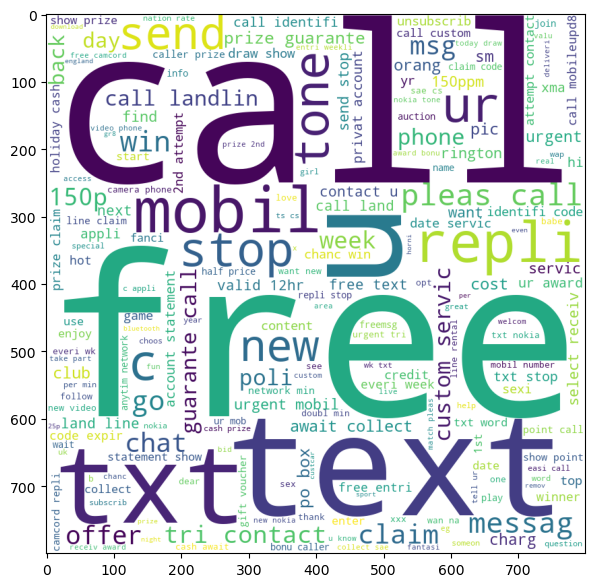

In [51]:
plt.figure(figsize=(10,7))
plt.imshow(spam_wc)

**In this word cloud image we can see the mostly word used in spam messeges are call, free, text, claim, stop, mobil etc.**

### Word Cloud For Ham Messeges

In [52]:
ham_wc = wc.generate(df_spam[df_spam['target']==0]['transformed_text'].str.cat(sep=" "))

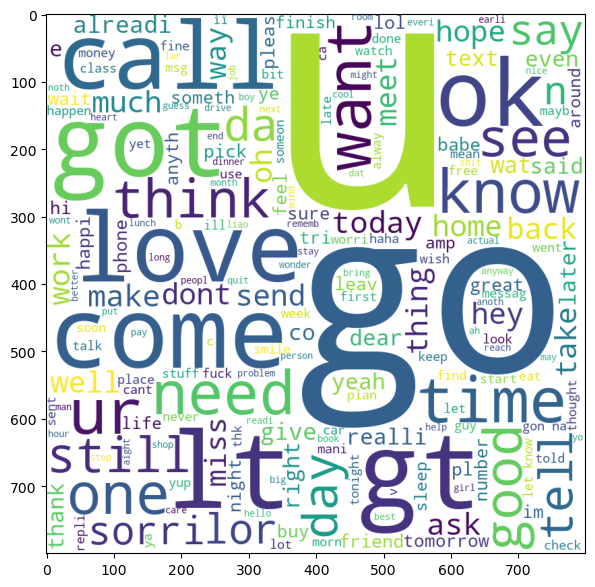

In [53]:
plt.figure(figsize=(10,7))
plt.imshow(ham_wc)

**In this word cloud image we can see the mostly word used in ham messeges are love, come, go, need, time, good, call, u, want etc.**

In [54]:
df_spam.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
# Create empty list spam_corpus for collecting the words in spam messeges

spam_corpus=[]
for msg in df_spam[df_spam['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [56]:
len(spam_corpus)

9939

**A Counter is a dict subclass for counting hashable objects. It is a collection where elements are stored as dictionary keys and their counts are stored as dictionary values. Counts are allowed to be any integer value including zero or negative counts.**

In [57]:
from collections import Counter


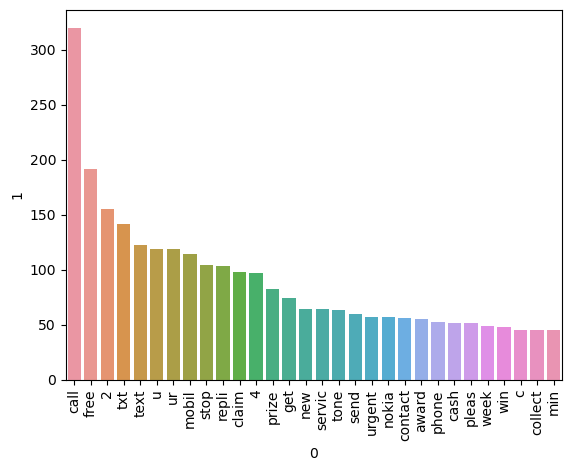

In [58]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

**In this bar plot we can see most common 30 words use in spam messeges.**

In [59]:
# Create empty list ham_corpus for collecting the words in ham messeges.

ham_corpus=[]
for msg1 in df_spam[df_spam['target']==0]['transformed_text'].tolist():
    for word1 in msg1.split():
        ham_corpus.append(word1)

In [60]:
len(ham_corpus)

35394

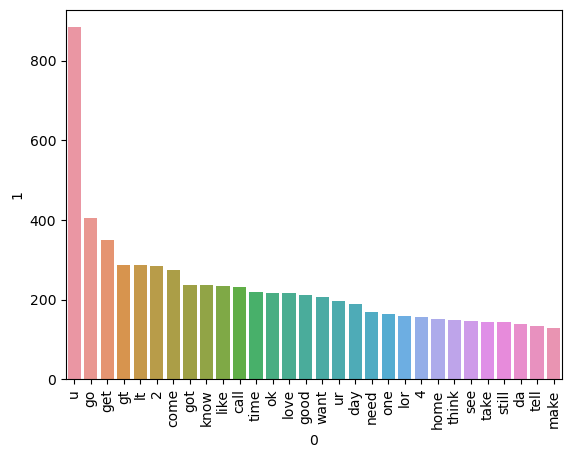

In [61]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

**In this bar plot we can see most common 30 words use in ham messeges.**

# 4. Model Building

### Convert Text Data InTo Numeric

In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [63]:
X = tfidf.fit_transform(df_spam['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Convert text messeges in to numeric form with the help of TfidfVectorizer(max_features=3000)**

**The purpose of max_features is to limit the number of features (words) from the dataset for which we want to calculate the TF-IDF scores. This is done by choosing the features based on term frequency across the corpus.**

**The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.**

In [64]:
X.shape

(5169, 3000)

In [65]:
y = df_spam['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [66]:
y.shape

(5169,)

#### Splitting The Data For Traning and Testing

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## 1. Naive Bayes Classifier

In [69]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [70]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

### a) GaussianNB

**Model Fitting**

In [72]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

**Accuracy Score**

In [73]:
print('\33[1m' + "GaussianNB accuracy_score : {}%".format(round(accuracy_score(y_test, y_pred1)*100, 2)))

GaussianNB accuracy_score : 86.94%


**Confusion Matrix**

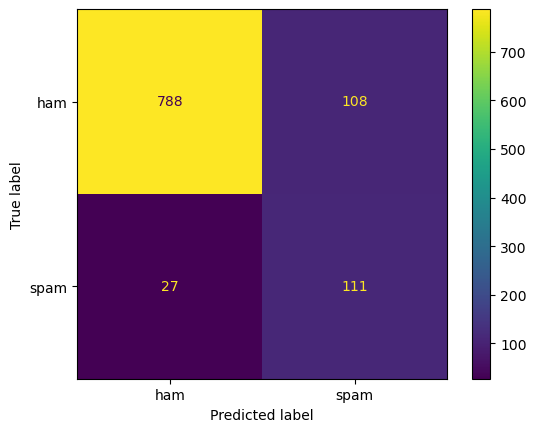

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred1)
cmd = ConfusionMatrixDisplay(cm, display_labels=['ham','spam'])
cmd.plot()

**Precision Score**

In [75]:
print('\33[1m' + "GaussianNB precision_score : {}%".format(round(precision_score(y_test, y_pred1)*100, 2)))

GaussianNB precision_score : 50.68%


### b) MultinomialNB

**Model Fitting**

In [76]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

#### Accuracy Score

In [77]:
print('\33[1m' + "MultinomialNB accuracy_score : {}%".format(round(accuracy_score(y_test, y_pred2)*100, 2)))

MultinomialNB accuracy_score : 97.1%


#### Confusion Matrix

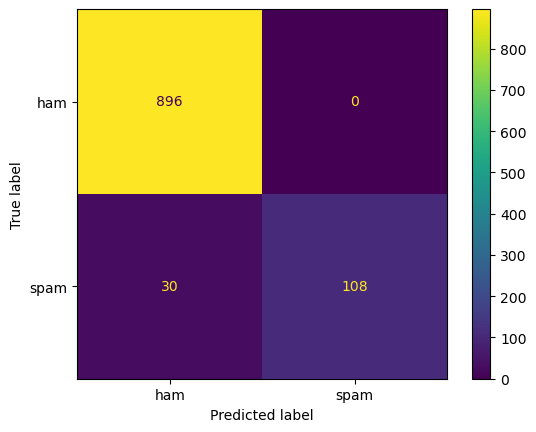

In [78]:
cm = confusion_matrix(y_test, y_pred2)
cmd = ConfusionMatrixDisplay(cm, display_labels=['ham','spam'])
cmd.plot()

### Precision Score

In [79]:
print('\33[1m' + "MultinomialNB precision_score : {}%".format(round(precision_score(y_test, y_pred2)*100, 2)))

MultinomialNB precision_score : 100.0%


### c) BernoulliNB

#### Model Fitting

In [80]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

#### Accuracy Score

In [81]:
print('\33[1m' + "BernoulliNB accuracy_score : {}%".format(round(accuracy_score(y_test, y_pred3)*100, 2)))

BernoulliNB accuracy_score : 98.36%


#### Confusion Matrix

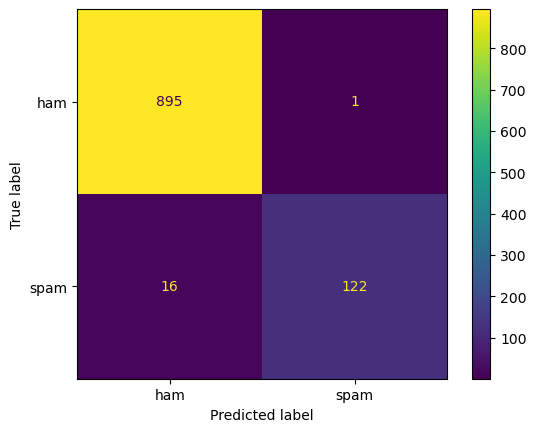

In [82]:
cm = confusion_matrix(y_test, y_pred3)
cmd = ConfusionMatrixDisplay(cm, display_labels=['ham','spam'])
cmd.plot()

#### Precision Score

In [83]:
print('\33[1m' + "BernoulliNB precision_score : {}%".format(round(precision_score(y_test, y_pred3)*100, 2)))

BernoulliNB precision_score : 99.19%


# 2. DecisionTreeClassifier

### Model Fitting

In [84]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

### Accuracy Score(DecisionTreeClassifier)

In [85]:
print('\33[1m' + "Decision Tree accuracy_score : {}%".format(round(accuracy_score(y_test, dtc_pred)*100, 2)))

Decision Tree accuracy_score : 95.16%


### Confusion Matrix(DecisionTreeClassifier)

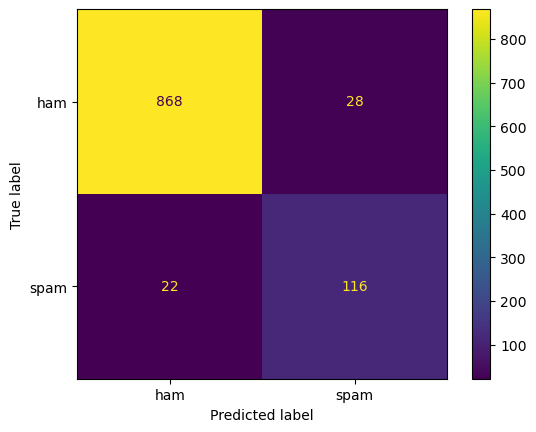

In [86]:
cm = confusion_matrix(y_test, dtc_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['ham','spam'])
cmd.plot()

### Precision Score(DecisionTreeClassifier)

In [87]:
print('\33[1m' + "Decision Tree precision_score : {}%".format(round(precision_score(y_test, dtc_pred)*100, 2)))

Decision Tree precision_score : 80.56%


# 3.RandomForestClassifier

### Model Fitting(RandomForestClassifier)

In [88]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

### Accuracy Score(RandomForestClassifier)

In [89]:
print('\33[1m' + "Random Forest accuracy_score : {}%".format(round(accuracy_score(y_test, rfc_pred)*100, 2)))

Random Forest accuracy_score : 97.58%


### Confusion Matrix(RandomForestClassifier)

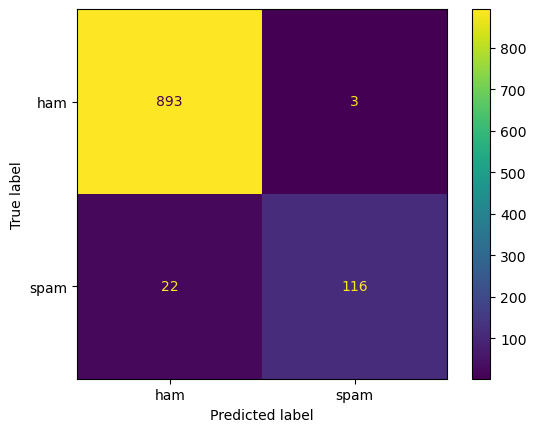

In [90]:
cm = confusion_matrix(y_test, rfc_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['ham','spam'])
cmd.plot()

### Precision Score(RandomForestClassifier)

In [91]:
print('\33[1m' + "Random Forest precision_score : {}%".format(round(precision_score(y_test, rfc_pred)*100, 2)))

Random Forest precision_score : 97.48%


# 4. SVC(Support Vector Classifier)

### Model Fitting(SVC)

In [92]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

### Accuracy Score(SVC)

In [93]:
print('\33[1m' + "SVC accuracy_score : {}%".format(round(accuracy_score(y_test, svc_pred)*100, 2)))

SVC accuracy_score : 97.29%


### Confusion Matrix(SVC)

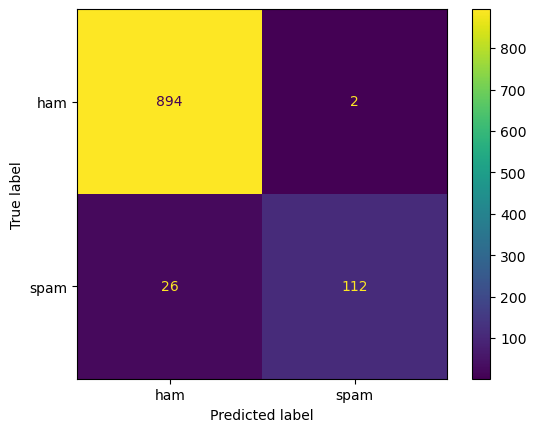

In [94]:
cm = confusion_matrix(y_test, svc_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['ham','spam'])
cmd.plot()

### Precision Score(SVC)

In [95]:
print('\33[1m' + "SVC precision_score : {}%".format(round(precision_score(y_test, svc_pred)*100, 2)))

SVC precision_score : 98.25%


# Algorithms Uses In This Model:

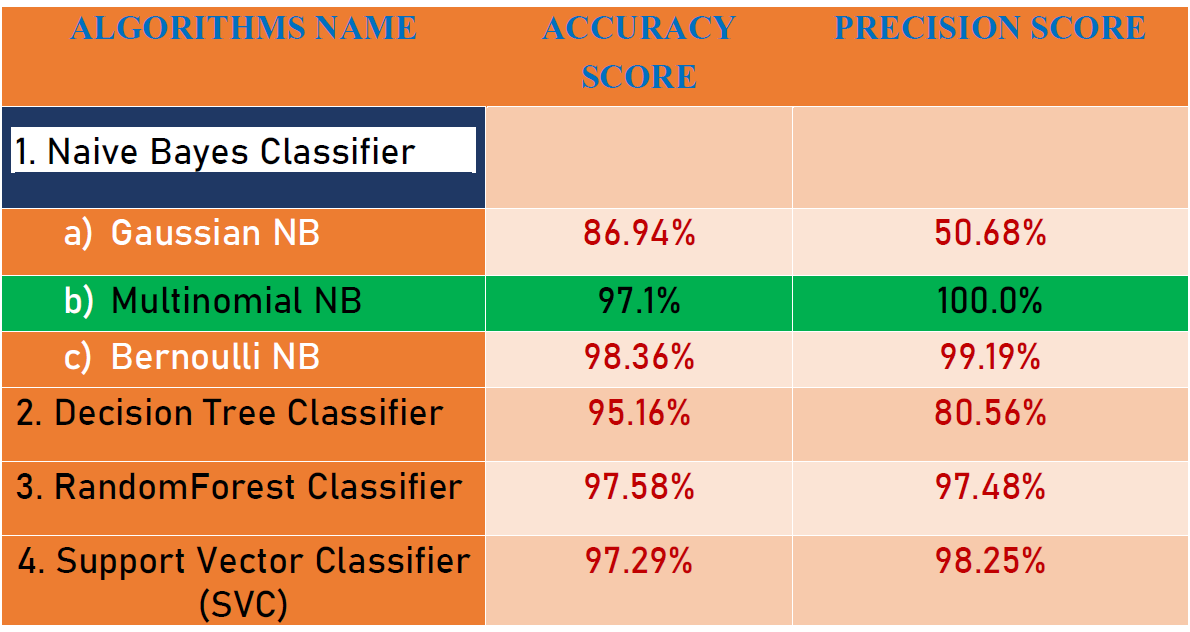

**We can see that in Naive Bayes Classifier the MultinomialNB and BernoulliNB both are best accuracy score and precision score but MultinomialNB is higher precision score 100%**

**The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.**

**The best value is 1 and the worst value is 0.**


**MultinomialNB is a Final Model because of precision score is 100.0%**

# Saving Final Model Naive Bayes Classifier(MultinomialNB)

In [96]:
import pickle
file_name = 'email_spam.pkl'
pickle.dump(mnb, open(file_name, 'wb'))

## Predictions of Test Dataset Using Final Model

In [97]:
import numpy as np

dt_a=np.array(y_test)
predicted=np.array(mnb.predict(X_test))
df_com = pd.DataFrame({'Original':dt_a, 'Predicted':predicted}, index=range(len(dt_a)))
df_com

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1029,0,0
1030,0,0
1031,0,0
1032,0,0


In [99]:
df_com.head(20)

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
5,1,0
6,0,0
7,0,0
8,0,0
9,0,0


In [100]:
df_com.tail(20)

,Original,Predicted
1014,1,1
1015,0,0
1016,0,0
1017,0,0
1018,0,0
1019,0,0
1020,0,0
1021,0,0
1022,0,0
1023,0,0


In [101]:
df_com.sample(20)

,Original,Predicted
971,0,0
1027,0,0
483,0,0
770,0,0
898,0,0
928,0,0
875,0,0
468,0,0
833,0,0
284,0,0


**We Can Visualize original and Predicted Value are 99% Correct Value**